In [3]:
import uproot4 as upr
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import particle

In [4]:
file = "/storage/gpfs_data/neutrino/users/gi/sand-physics/test_AnalyseGenie_stt_4KinSelection.root"

In [5]:
file = upr.open(file)["myTree"]

In [12]:
file.keys()

['InteractionTarget',
 'EventType',
 'FinalStateTopologyName',
 'FinalHadronicSystemP4_TT',
 'InitialNucleonMomentum',
 'TransverseBoostingAngle',
 'Asimmetry_RmH']

In [6]:
df = file.arrays(['InteractionTarget',
                  'FinalHadronicSystemP4_TT',
                  'InitialNucleonMomentum',
                  'TransverseBoostingAngle',
                  'Asimmetry_RmH',
                  'EventType'],library='pd')

group_interaction_targets = lambda x : x if x == "proton" or x == 'C12' else "Heavy nucleus"
df["InteractionTarget_grouped"] = df["InteractionTarget"].apply(group_interaction_targets)
df["ScaleFactor"]=2.884724e-44

/home/NEUTRINO/gianfrancoingratta/.local/lib/python3.6/site-packages/seaborn/distributions.py:365: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  and estimate_kws["bins"] == "auto"
/home/NEUTRINO/gianfrancoingratta/.local/lib/python3.6/site-packages/seaborn/distributions.py:365: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  and estimate_kws["bins"] == "auto"
/home/NEUTRINO/gianfrancoingratta/.local/lib/python3.6/site-packages/seaborn/distributions.py:365: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  and estimate_kws["bins"] == "auto"


Text(0.5, 1.0, 'double-transverse momentum imbalance MC truth - Heavy nucleus')

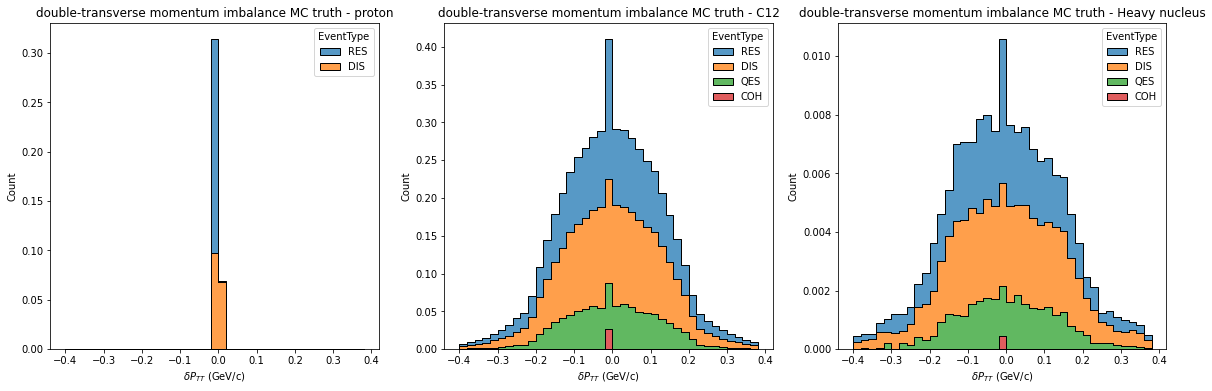

In [7]:
fig,ax = plt.subplots(1,3,figsize=(20,6))

sns.histplot(data=df[df.InteractionTarget_grouped=="proton"],x="FinalHadronicSystemP4_TT",hue="EventType",weights=df.ScaleFactor*1e38,
             multiple="stack",element="step",bins=np.arange(-0.4,0.4,0.02), ax=ax[0])

sns.histplot(data=df[df.InteractionTarget_grouped=="C12"],x="FinalHadronicSystemP4_TT",hue="EventType",weights=df.ScaleFactor*1e38,
             multiple="stack",element="step",bins=np.arange(-0.4,0.4,0.02), ax=ax[1])

sns.histplot(data=df[df.InteractionTarget_grouped=="Heavy nucleus"],x="FinalHadronicSystemP4_TT",hue="EventType",weights=df.ScaleFactor*1e38,
             multiple="stack",element="step",bins=np.arange(-0.4,0.4,0.02), ax=ax[2])

ax[0].set_xlabel("$\delta$$P_{TT}$ (GeV/c)")
ax[0].set_title("double-transverse momentum imbalance MC truth - proton")

ax[1].set_xlabel("$\delta$$P_{TT}$ (GeV/c)")
ax[1].set_title("double-transverse momentum imbalance MC truth - C12")

ax[2].set_xlabel("$\delta$$P_{TT}$ (GeV/c)")
ax[2].set_title("double-transverse momentum imbalance MC truth - Heavy nucleus")

/home/NEUTRINO/gianfrancoingratta/.local/lib/python3.6/site-packages/seaborn/distributions.py:365: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  and estimate_kws["bins"] == "auto"
/home/NEUTRINO/gianfrancoingratta/.local/lib/python3.6/site-packages/seaborn/distributions.py:365: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  and estimate_kws["bins"] == "auto"
/home/NEUTRINO/gianfrancoingratta/.local/lib/python3.6/site-packages/seaborn/distributions.py:365: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  and estimate_kws["bins"] == "auto"


Text(0.5, 1.0, 'Initital Nucleon momentum - Heavy nucleus')

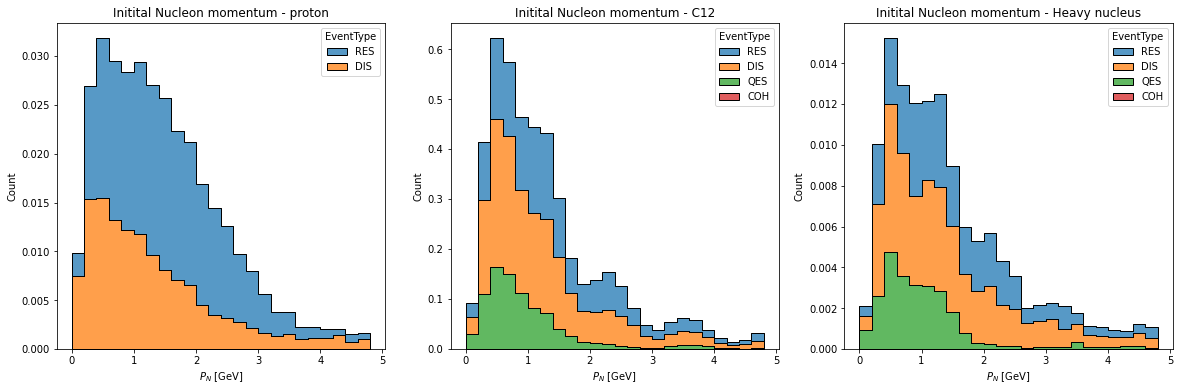

In [8]:
fig,ax = plt.subplots(1,3,figsize=(20,6))

sns.histplot(data=df[df.InteractionTarget_grouped=="proton"],x="InitialNucleonMomentum",hue="EventType",weights=df.ScaleFactor*1e38,
             multiple="stack",element="step",bins=np.arange(0,5,0.2), ax=ax[0])

sns.histplot(data=df[df.InteractionTarget_grouped=="C12"],x="InitialNucleonMomentum",hue="EventType",weights=df.ScaleFactor*1e38,
             multiple="stack",element="step",bins=np.arange(0,5,0.2), ax=ax[1])

sns.histplot(data=df[df.InteractionTarget_grouped=="Heavy nucleus"],x="InitialNucleonMomentum",hue="EventType",weights=df.ScaleFactor*1e38,
             multiple="stack",element="step",bins=np.arange(0,5,0.2), ax=ax[2])

ax[0].set_xlabel("$P_N$ [GeV]")
ax[0].set_title("Initital Nucleon momentum - proton")

ax[1].set_xlabel("$P_N$ [GeV]")
ax[1].set_title("Initital Nucleon momentum - C12")

ax[2].set_xlabel("$P_N$ [GeV]")
ax[2].set_title("Initital Nucleon momentum - Heavy nucleus")

/home/NEUTRINO/gianfrancoingratta/.local/lib/python3.6/site-packages/seaborn/distributions.py:365: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  and estimate_kws["bins"] == "auto"
/home/NEUTRINO/gianfrancoingratta/.local/lib/python3.6/site-packages/seaborn/distributions.py:365: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  and estimate_kws["bins"] == "auto"
/home/NEUTRINO/gianfrancoingratta/.local/lib/python3.6/site-packages/seaborn/distributions.py:365: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  and estimate_kws["bins"] == "auto"


Text(0.5, 1.0, 'Transverse Boosting Angle - Heavy nucleus')

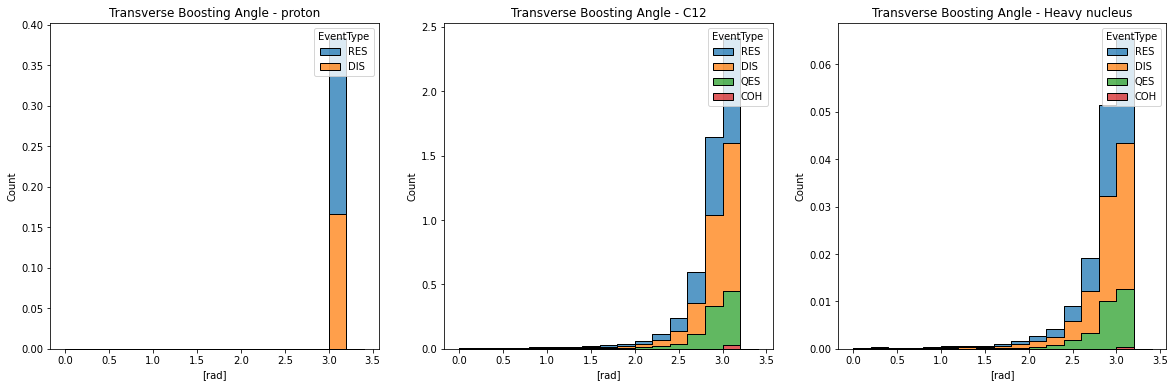

In [14]:
fig,ax = plt.subplots(1,3,figsize=(20,6))

sns.histplot(data=df[df.InteractionTarget_grouped=="proton"],x="TransverseBoostingAngle",hue="EventType",weights=df.ScaleFactor*1e38,
             multiple="stack",element="step",bins=np.arange(0,np.pi*1.1,0.2), ax=ax[0])

sns.histplot(data=df[df.InteractionTarget_grouped=="C12"],x="TransverseBoostingAngle",hue="EventType",weights=df.ScaleFactor*1e38,
             multiple="stack",element="step",bins=np.arange(0,np.pi*1.1,0.2), ax=ax[1])

sns.histplot(data=df[df.InteractionTarget_grouped=="Heavy nucleus"],x="TransverseBoostingAngle",hue="EventType",weights=df.ScaleFactor*1e38,
             multiple="stack",element="step",bins=np.arange(0,np.pi*1.1,0.2), ax=ax[2])

ax[0].set_xlabel("[rad]")
ax[0].set_title("Transverse Boosting Angle - proton")

ax[1].set_xlabel("[rad]")
ax[1].set_title("Transverse Boosting Angle - C12")

ax[2].set_xlabel("[rad]")
ax[2].set_title("Transverse Boosting Angle - Heavy nucleus")

/home/NEUTRINO/gianfrancoingratta/.local/lib/python3.6/site-packages/seaborn/distributions.py:365: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  and estimate_kws["bins"] == "auto"
/home/NEUTRINO/gianfrancoingratta/.local/lib/python3.6/site-packages/seaborn/distributions.py:365: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  and estimate_kws["bins"] == "auto"
/home/NEUTRINO/gianfrancoingratta/.local/lib/python3.6/site-packages/seaborn/distributions.py:365: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  and estimate_kws["bins"] == "auto"


Text(0.5, 1.0, '$R_{mH}=(p^m_T-p^H_T)/(p^m_T+p^H_T)$ - Heavy nucleus')

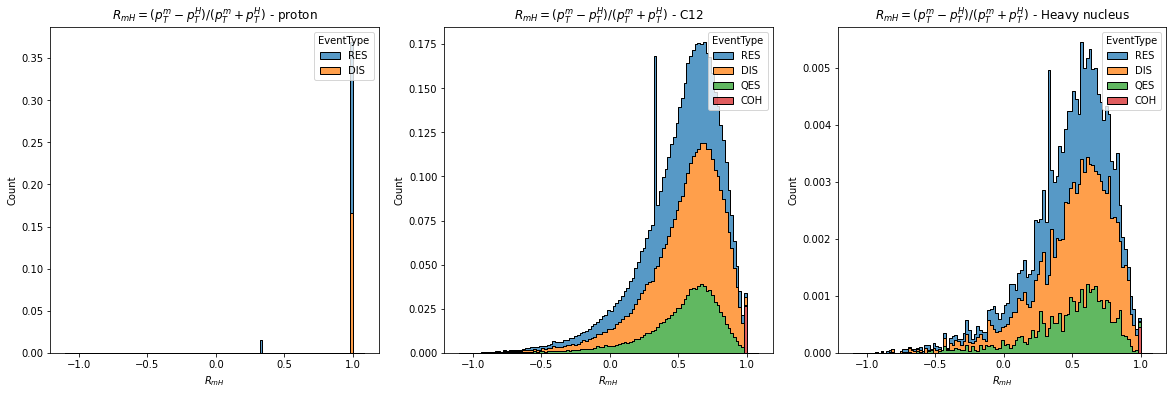

In [13]:
fig,ax = plt.subplots(1,3,figsize=(20,6))

sns.histplot(data=df[df.InteractionTarget_grouped=="proton"],x="Asimmetry_RmH",hue="EventType",weights=df.ScaleFactor*1e38,
             multiple="stack",element="step",bins=np.arange(-1.1,1.1,0.02), ax=ax[0])

sns.histplot(data=df[df.InteractionTarget_grouped=="C12"],x="Asimmetry_RmH",hue="EventType",weights=df.ScaleFactor*1e38,
             multiple="stack",element="step",bins=np.arange(-1.1,1.1,0.02), ax=ax[1])

sns.histplot(data=df[df.InteractionTarget_grouped=="Heavy nucleus"],x="Asimmetry_RmH",hue="EventType",weights=df.ScaleFactor*1e38,
             multiple="stack",element="step",bins=np.arange(-1.1,1.1,0.02), ax=ax[2])

ax[0].set_xlabel("$R_{mH}$")
ax[0].set_title("$R_{mH}=(p^m_T-p^H_T)/(p^m_T+p^H_T)$ - proton")

ax[1].set_xlabel("$R_{mH}$")
ax[1].set_title("$R_{mH}=(p^m_T-p^H_T)/(p^m_T+p^H_T)$ - C12")

ax[2].set_xlabel("$R_{mH}$")
ax[2].set_title("$R_{mH}=(p^m_T-p^H_T)/(p^m_T+p^H_T)$ - Heavy nucleus")

<AxesSubplot:xlabel='Asimmetry_RmH', ylabel='TransverseBoostingAngle'>

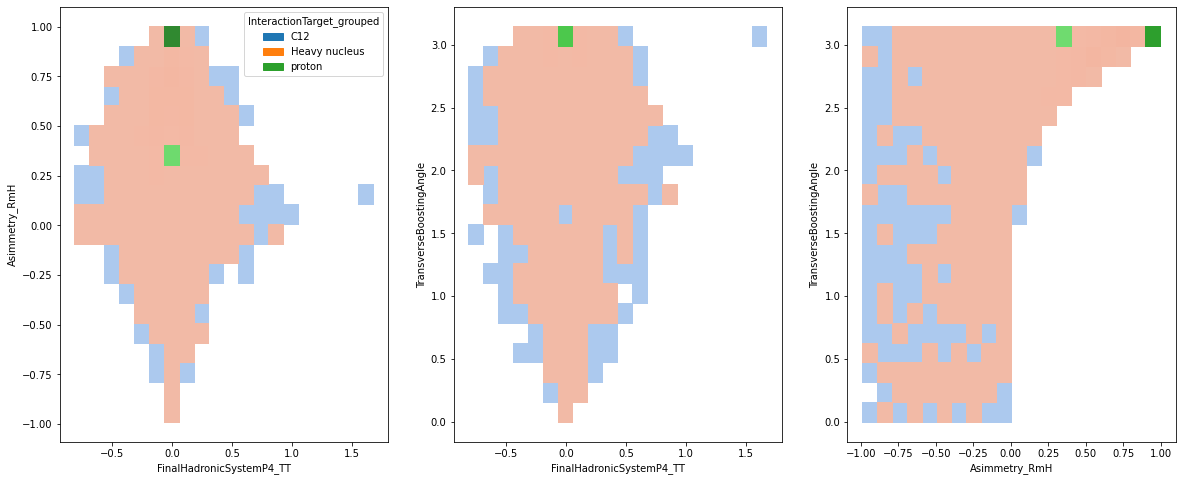

In [11]:
fig,ax=plt.subplots(1,3,figsize=(20,8))
sns.histplot(data=df,x="FinalHadronicSystemP4_TT",y="Asimmetry_RmH",hue="InteractionTarget_grouped",ax=ax[0],bins=20)
sns.histplot(data=df,x="FinalHadronicSystemP4_TT",y="TransverseBoostingAngle",hue="InteractionTarget_grouped",ax=ax[1],bins=20,legend=False)
sns.histplot(data=df,x="Asimmetry_RmH",y="TransverseBoostingAngle",hue="InteractionTarget_grouped",ax=ax[2],bins=20,legend=False)